In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import torch
import torchvision

from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from pathlib import Path

import matplotlib.pyplot as plt

In [2]:
train_data = datasets.Food101(
    root="data", 
    split="train",
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.Food101(
    root="data",
    split="test",
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100.0%


Extracting data\food-101.tar.gz to data


In [4]:
len(train_data), len(test_data)

(75750, 25250)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.9725, 0.9686, 0.9608,  ..., 0.3216, 0.3490, 0.3686],
          [0.9725, 0.9686, 0.9608,  ..., 0.3412, 0.3608, 0.3725],
          [0.9765, 0.9686, 0.9647,  ..., 0.3647, 0.3765, 0.3804],
          ...,
          [0.5961, 0.5922, 0.5882,  ..., 0.5804, 0.5922, 0.6078],
          [0.5882, 0.5843, 0.5765,  ..., 0.5843, 0.5922, 0.6039],
          [0.5843, 0.5765, 0.5647,  ..., 0.5922, 0.5961, 0.6039]],
 
         [[0.9569, 0.9529, 0.9451,  ..., 0.0941, 0.1098, 0.1294],
          [0.9569, 0.9529, 0.9451,  ..., 0.1137, 0.1216, 0.1333],
          [0.9608, 0.9529, 0.9490,  ..., 0.1373, 0.1373, 0.1412],
          ...,
          [0.2980, 0.2941, 0.2902,  ..., 0.5451, 0.5647, 0.5804],
          [0.2902, 0.2863, 0.2784,  ..., 0.5490, 0.5647, 0.5765],
          [0.2863, 0.2784, 0.2667,  ..., 0.5569, 0.5686, 0.5765]],
 
         [[0.9608, 0.9569, 0.9490,  ..., 0.0157, 0.0275, 0.0471],
          [0.9608, 0.9569, 0.9490,  ..., 0.0353, 0.0471, 0.0510],
          [0.9647, 0.9569, 0.9529,  ...,

In [6]:
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [9]:
image.shape, label

(torch.Size([3, 512, 512]), 23)

Image shape: torch.Size([3, 512, 512])


Text(0.5, 1.0, '23')

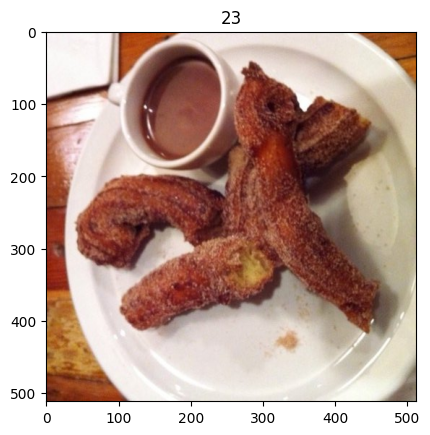

In [38]:
# Visualize the data
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.T)
plt.title(label)

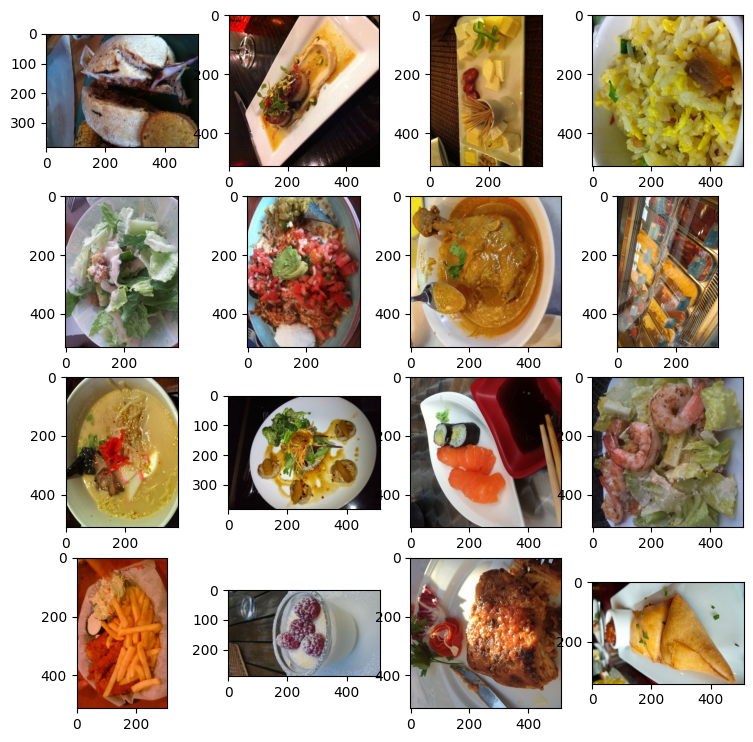

In [44]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.T)


In [55]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2b6e3e8ab10>,
 <torch.utils.data.dataloader.DataLoader at 0x2b6e3fdc440>)

In [56]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([1, 3, 289, 512]), torch.Size([1]))

size: torch.Size([3, 512, 512])


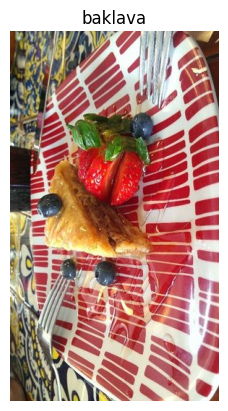

In [65]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.T)
plt.title(class_names[label])
plt.axis(False)
print(f"size: {image.shape}")


In [78]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)
output.shape, x.shape

(torch.Size([3, 147968]), torch.Size([3, 289, 512]))

In [94]:
from torch import nn
class Food101Model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [95]:
torch.manual_seed(42)
model_0 = Food101Model(input_shape=147968, hidden_units=10, output_shape=len(class_names)).to("cpu")
model_0

Food101Model(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=147968, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=101, bias=True)
  )
)

In [98]:
dummy_x = torch.rand([1, 1, 289, 512])
model_0(dummy_x)

tensor([[ 0.1056, -0.3080,  0.1505,  0.3275,  0.3054,  0.0809, -0.2542, -0.4780,
          0.3965,  0.2565, -0.2793,  0.1123, -0.4971, -0.0471, -0.2778,  0.2210,
          0.1763, -0.0432, -0.1792,  0.0530, -0.0156, -0.2556,  0.1249, -0.0849,
          0.4538, -0.3297, -0.2934, -0.1533,  0.1233,  0.0608,  0.0203,  0.3424,
          0.3343, -0.1443,  0.0235, -0.2642,  0.1234, -0.2196,  0.1909, -0.0877,
         -0.3106, -0.1857,  0.1790, -0.4658, -0.3681,  0.3953, -0.3854,  0.1729,
         -0.0591,  0.0150, -0.2322, -0.2400,  0.0801, -0.0124, -0.0937, -0.3272,
          0.2102,  0.3054, -0.1536,  0.5556,  0.0928, -0.1269,  0.4927, -0.2817,
         -0.4608,  0.1408, -0.0787,  0.3492, -0.0741,  0.4013, -0.2256,  0.2958,
         -0.0027,  0.4165, -0.4609, -0.0602, -0.2368,  0.3099,  0.5430, -0.1435,
         -0.0952, -0.1126, -0.0479,  0.1603,  0.2168, -0.0025, -0.3032,  0.1992,
          0.3740,  0.2043, -0.0560, -0.0610, -0.1911, -0.2579,  0.5746,  0.3758,
         -0.0592, -0.0787, -

In [99]:
import requests 
from pathlib import Path

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [100]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [101]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.7799902707338333e-05

In [121]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        if len(X.shape) < 4 or len(y.shape) < 4:
            continue
        if X.shape[2] != 512 or X.shape[3] != 512 or y.shape[2] != 512 or y.shape[3] != 512:
            continue
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    test_loss = 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)

        test_loss /= len(test_data)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------


  0%|          | 0/3 [07:17<?, ?it/s]


KeyboardInterrupt: 

In [113]:
i = 0
for b, (x, y) in enumerate(train_dataloader):
    if i == 3: 
        break
    print(x.shape[2], y.shape)
    i += 1

512 torch.Size([1])
512 torch.Size([1])
288 torch.Size([1])
